In [102]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
plt.style.use('fivethirtyeight')
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [103]:
url = 'https://github.com/idandrd/israel-covid19-data/raw/master/IsraelCOVID19.csv'
df = pd.read_csv(url, index_col=0)


In [104]:
df['actual'] = df['Total Cases'] - df['Total Recovered']

In [105]:
df['actual_no_death'] = df['actual'] - df['נפטרו Deceased']

In [106]:
df = df[30:]

In [107]:
df

,Total Cases,New Cases,בינוני Moderate,קשה Severe,נפטרו Deceased,Total Recovered,New Recovered,נבדקים היום Tested Today,"סה""כ נבדקים Total Tested",אחוז חיוביים Percent Positive,GF Normalized to Tests,Baseline,actual,actual_no_death
Date,,,,,,,,,,,,,,
22/03/2020,1272.0,249.0,30.0,24.0,1.0,45.0,5.0,3359.0,24731.0,7.41,1.0,1.0,1227.0,1226.0
23/03/2020,1620.0,348.0,38.0,29.0,1.0,65.0,20.0,3865.0,28596.0,9.00,1.0,1.0,1555.0,1554.0
24/03/2020,2042.0,422.0,45.0,37.0,3.0,79.0,14.0,5067.0,33663.0,8.33,1.0,1.0,1963.0,1960.0
25/03/2020,2465.0,423.0,64.0,39.0,5.0,89.0,10.0,5240.0,38903.0,8.07,1.0,1.0,2376.0,2371.0
26/03/2020,2993.0,528.0,65.0,46.0,8.0,101.0,12.0,5555.0,44458.0,9.50,1.0,1.0,2892.0,2884.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30/05/2020,17028.0,28.0,NaN,NaN,284.0,14792.0,16.0,1014.0,562093.0,2.76,0.0,1.0,2236.0,1952.0
31/05/2020,17115.0,87.0,NaN,NaN,285.0,14811.0,19.0,5423.0,567516.0,1.60,1.0,1.0,2304.0,2019.0
01/06/2020,17213.0,98.0,NaN,NaN,288.0,14878.0,67.0,5636.0,573152.0,1.74,1.0,1.0,2335.0,2047.0


## number of active cases(blue) vs total cases(red)

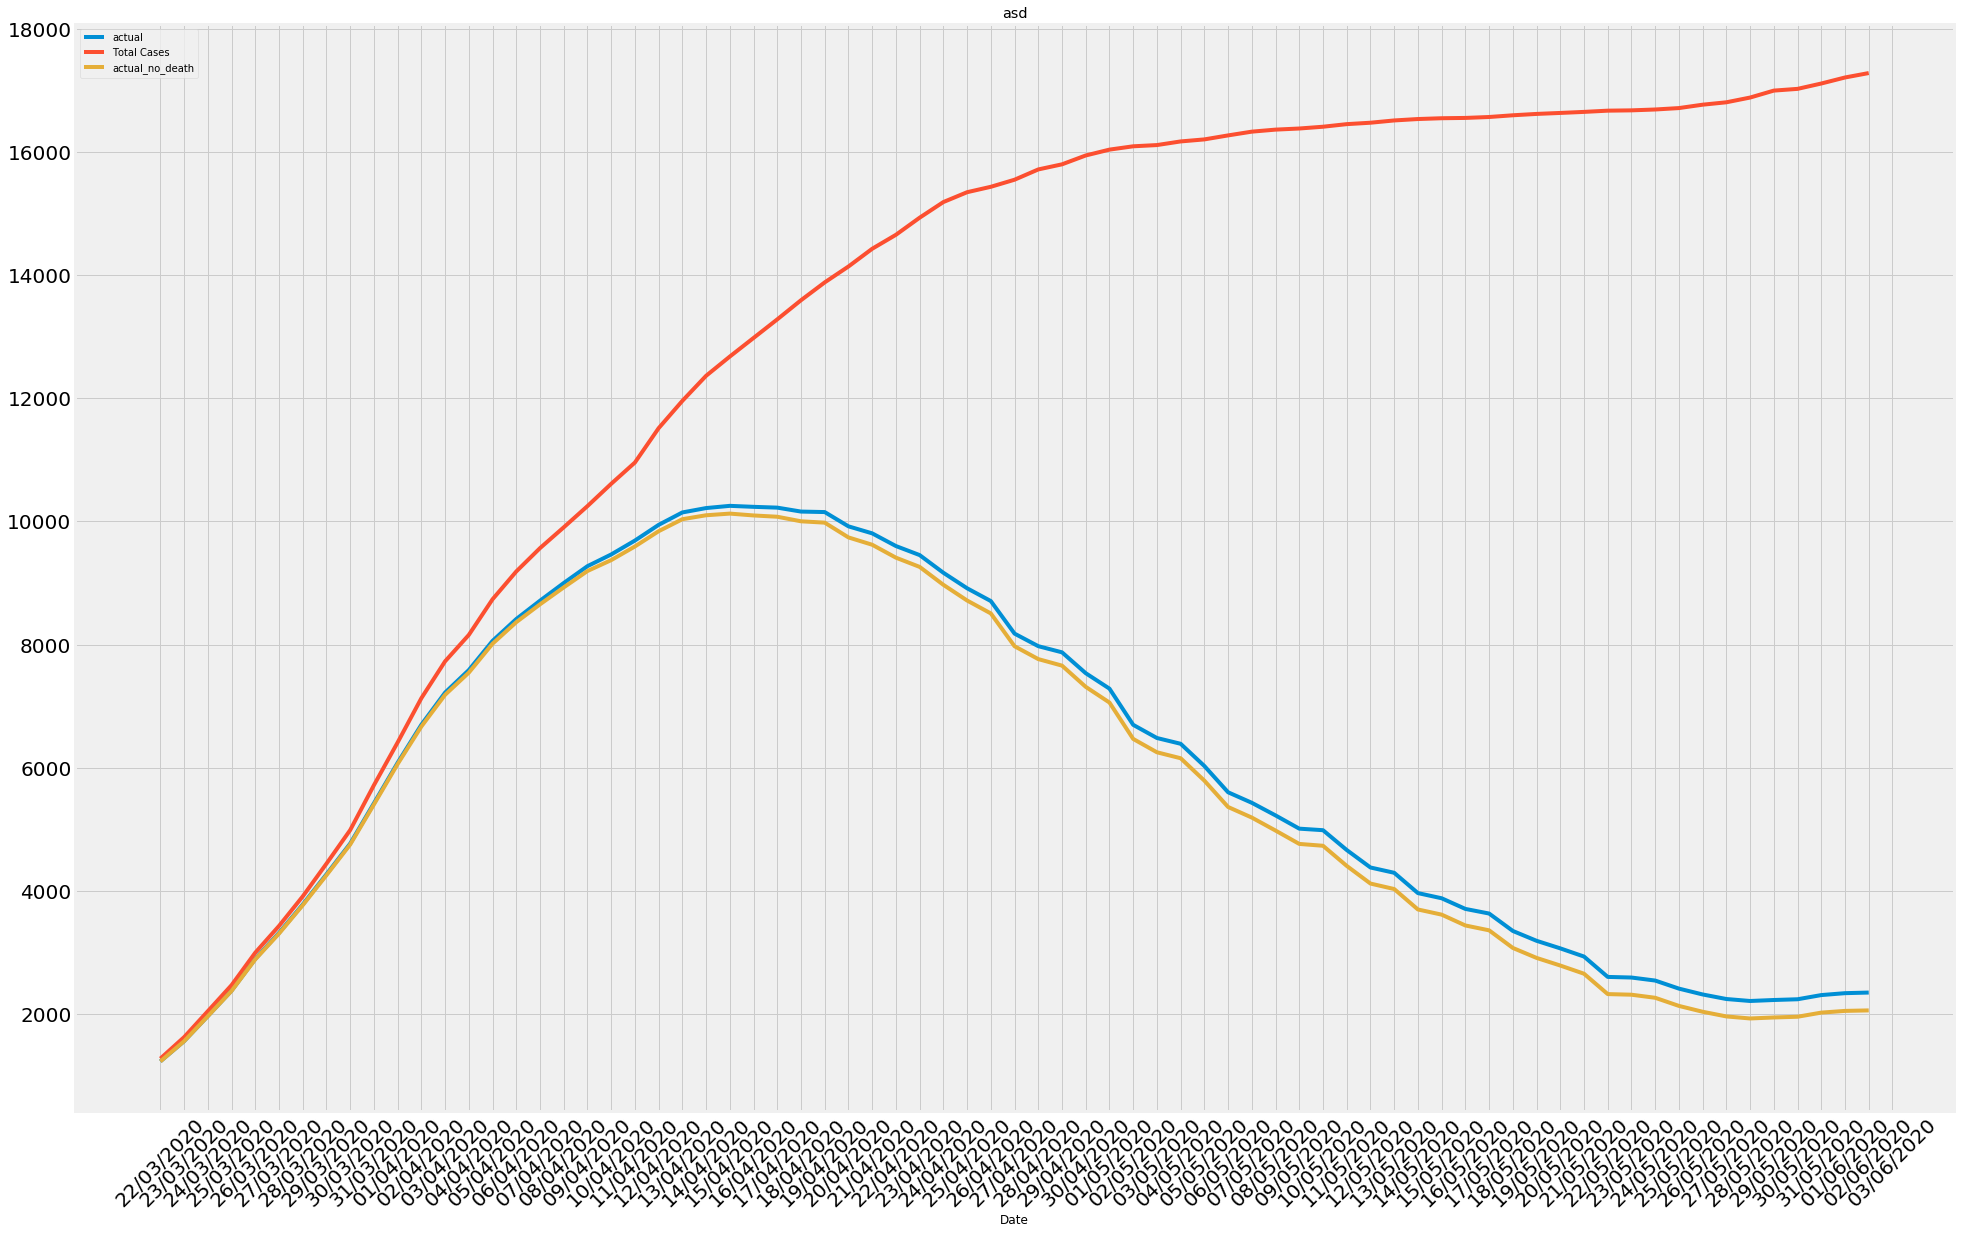

In [108]:
df[['actual','Total Cases','actual_no_death']].plot(kind='line',
                                                    title = 'asd',
                                                    figsize=(30,20),
                                                    rot=45,fontsize=20,
                                                    xticks = range(0,len(df.index)))

## number of moderate(blue), severe(red) and dead(yellow) cases

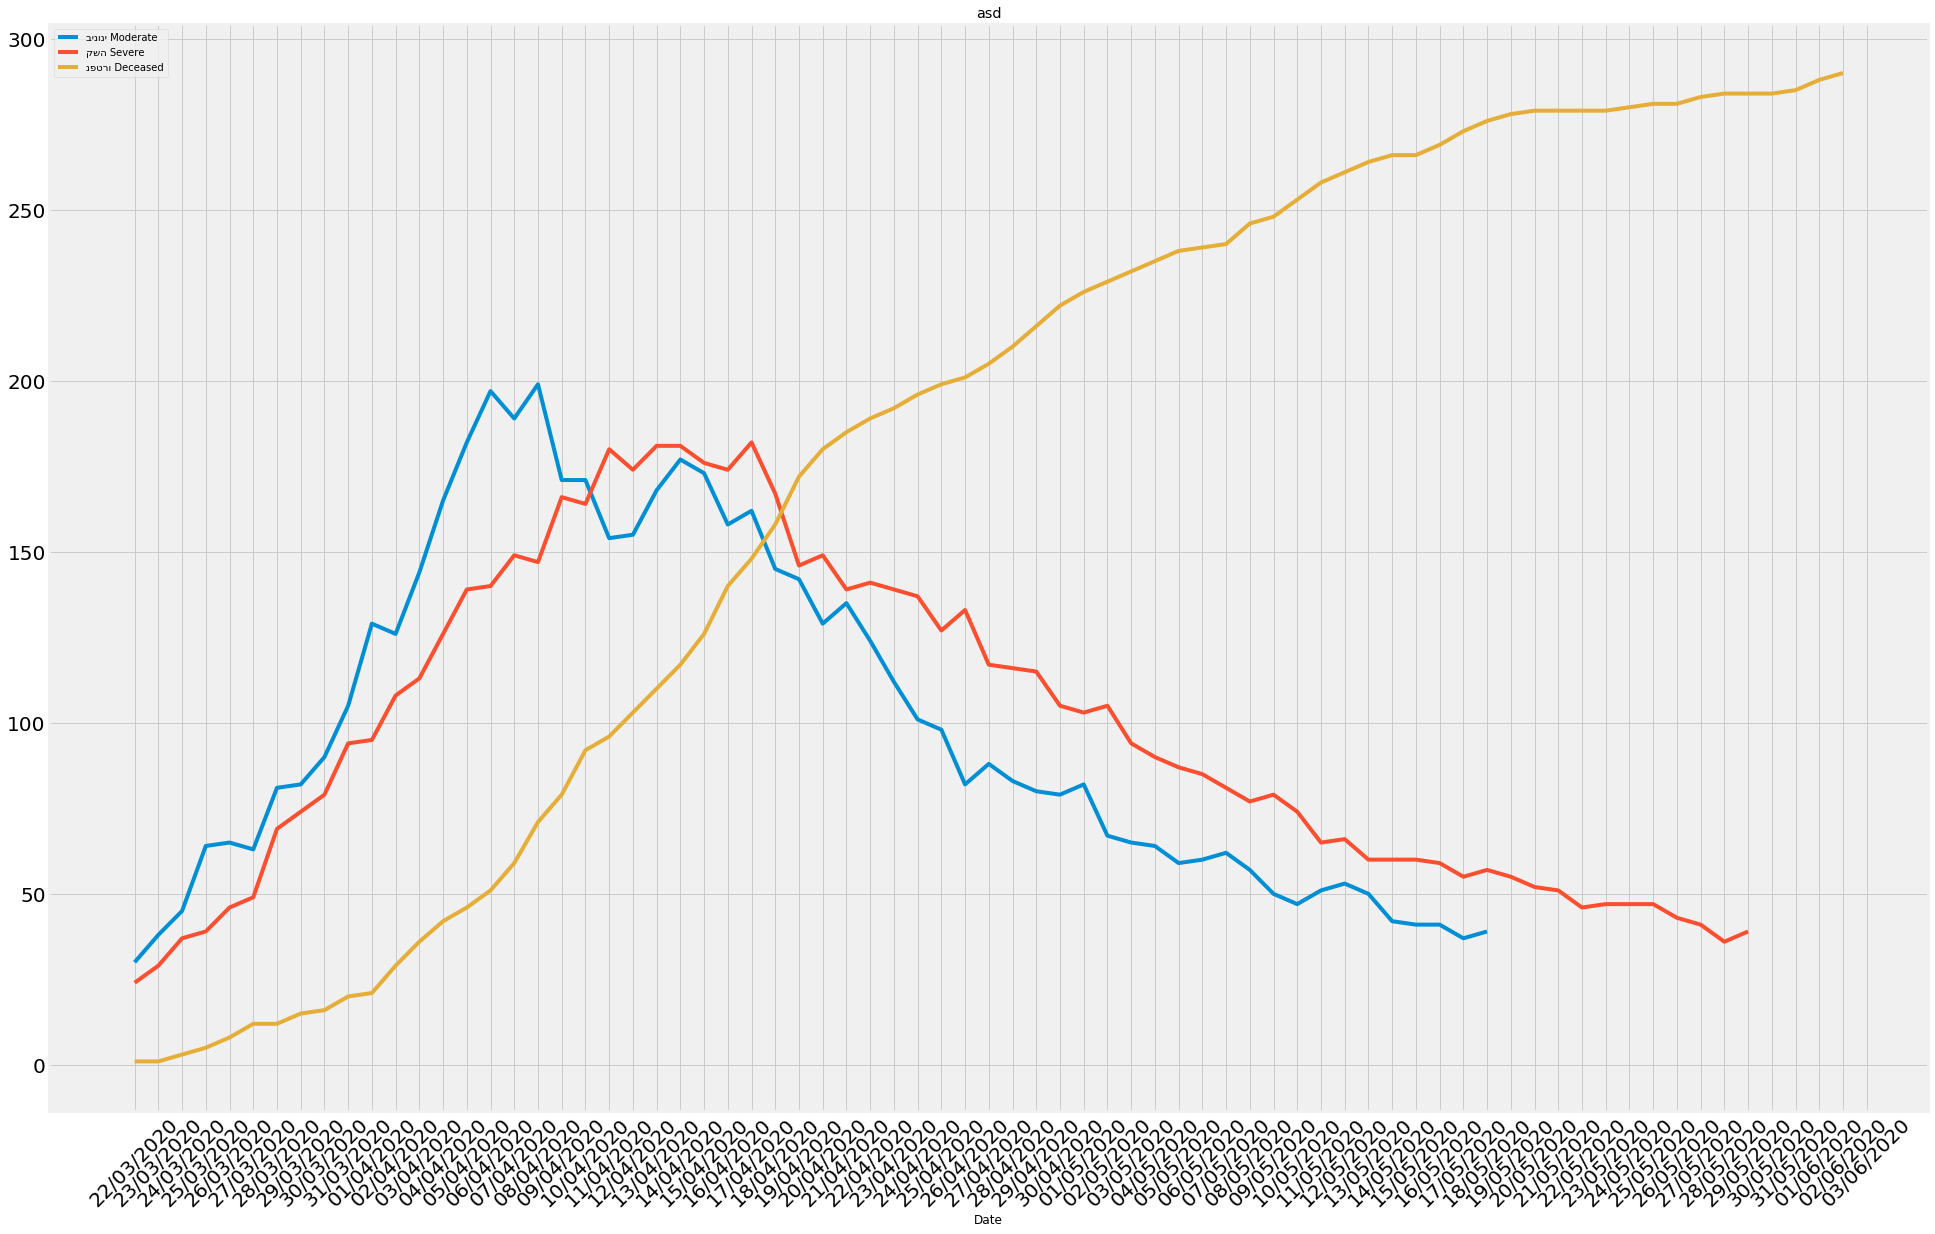

In [109]:
df[['בינוני Moderate','קשה Severe', 'נפטרו Deceased']].plot(kind='line',
                                                    title = 'asd',
                                                    figsize=(30,20),
                                                    rot=45,fontsize=20,
                                                    xticks = range(0,len(df.index)))

## percentage of change in new  cases

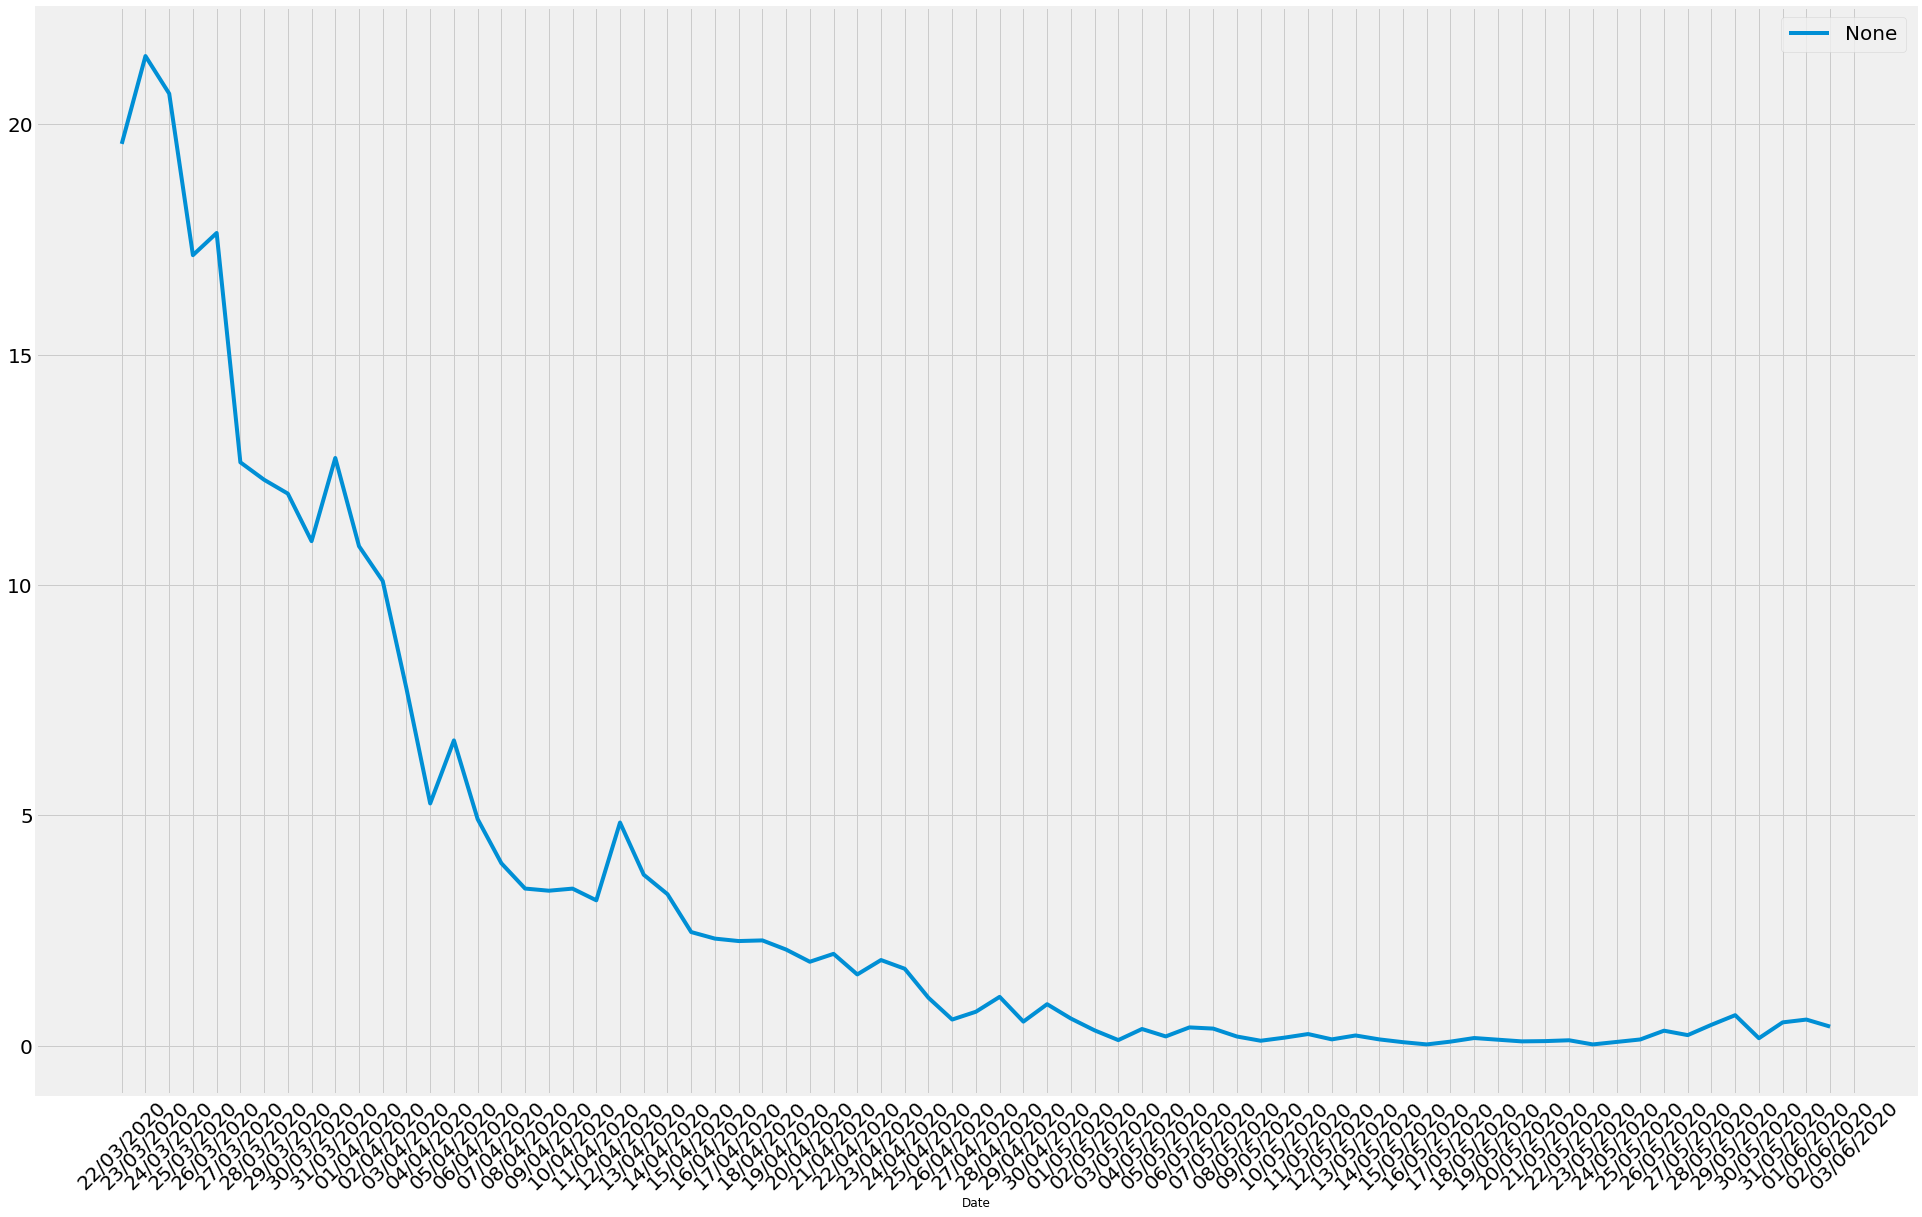

In [110]:
(df['New Cases'] / df['Total Cases'] * 100).plot(kind='line',figsize=(30,20),rot=45,fontsize=20,xticks = range(0,len(df.index))).legend(fontsize=20)

## change in precentage from prev day  of moderate(blue), severe(red) and dead(yellow) and new cases(green)

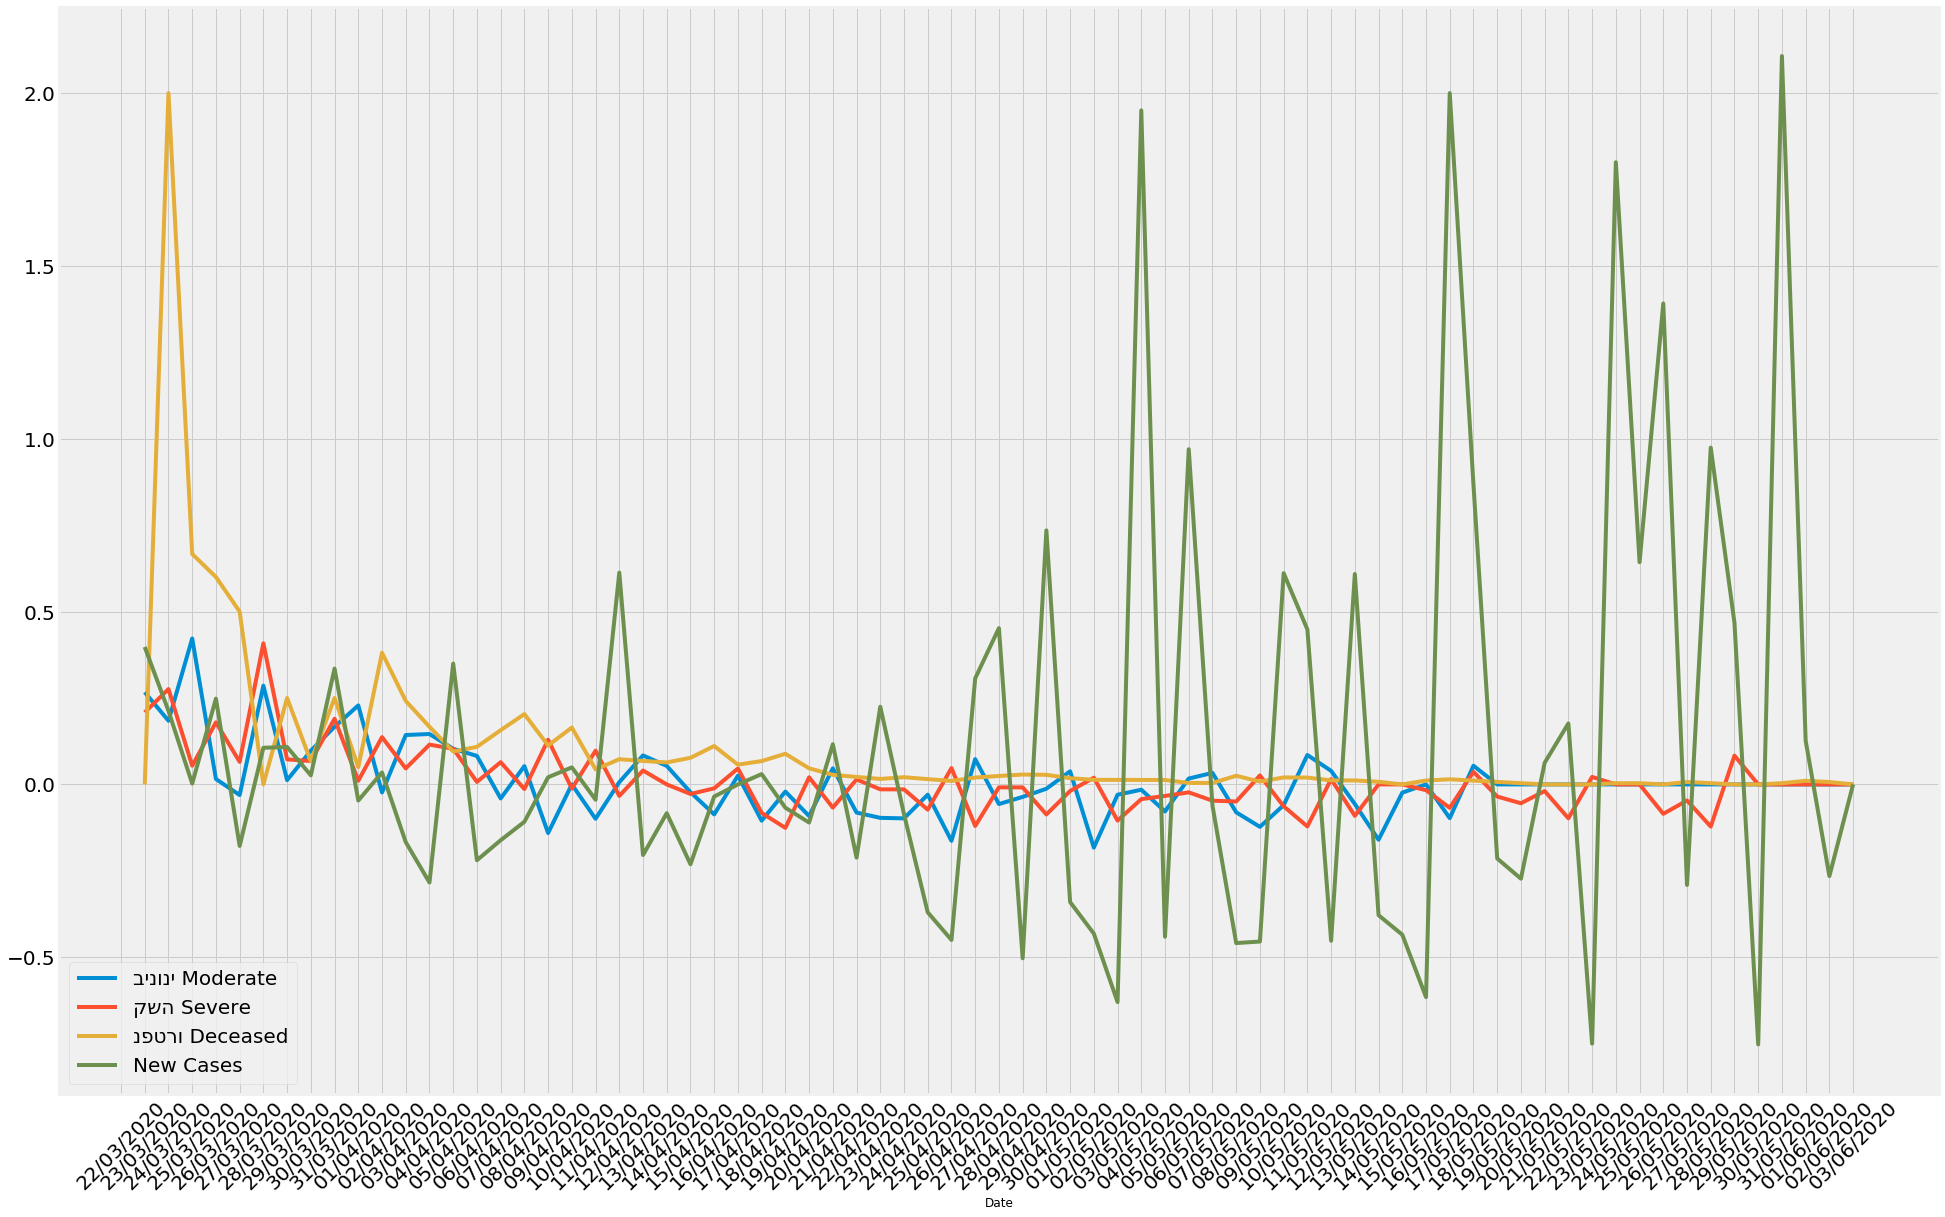

In [111]:
df[['בינוני Moderate','קשה Severe', 'נפטרו Deceased','New Cases']].pct_change().plot(kind='line',figsize=(30,20),rot=45,fontsize=20,xticks = range(0,len(df.index))).legend(fontsize=20)